## Practice Raster Transforms, Band Math & Algorithms

In this practice module we use concepts from our transforms, band math and raster algorithms labs.

The data can be obtained from https://landsat-pds.s3.amazonaws.com/L8/042/035/LC80420352013156LGN00/index.html

### Task: Obtaining the red (band 4) and near-infrared (band 5) bands of Landsat-8 collection
Store the band images in `../temp/LC80420352013156LGN00/` folder.

_Note: Make sure you are downloading files with `.TIF` extension only_

In [1]:
# M6:P6:Cell01
# Add your code to download the file
#--------------------------------

# Imports
import rasterio
from path import Path
import urllib.request
import shutil
import numpy as np
import matplotlib.pyplot as plt

# File URL and Local File Path Variables - Red band
ReBAND_URL = 'https://landsat-pds.s3.amazonaws.com/L8/042/035/LC80420352013156LGN00/LC80420352013156LGN00_B4.TIF'
local_file_name = 'redband.TIF'

file_path = Path('../temp/LC80420352013156LGN00/')
file_path /= local_file_name
# Download and Save - Red band

with urllib.request.urlopen(ReBAND_URL) as response,file_path.open(mode='w+b') as outfile:
    shutil.copyfileobj(response,outfile)


# File URL and Local File Path Variables - near-infrared band
NIr_BAND_URL = 'https://landsat-pds.s3.amazonaws.com/L8/042/035/LC80420352013156LGN00/LC80420352013156LGN00_B5.TIF'
local_file_name='nearIRband.TIF'

file_path = Path('../temp/LC80420352013156LGN00/')
file_path /= local_file_name

# Download and Save - near-infrared band
with urllib.request.urlopen(NIr_BAND_URL) as response,file_path.open(mode='w+b') as outfile:
    shutil.copyfileobj(response,outfile)





We then expect, if all went well, that we can load the file with the next cell.

<span style="background:yellow">If you get any errors </span>, carefully resolve your issues until your directory structure under module5 for the `temp` folder matches in above code!


In [2]:
###### TRY TO GET THIS CELL TO RUN WITHOUT CHANGES

import rasterio

src = rasterio.open('../temp/LC80420352013156LGN00/redband.TIF')
redband = src.read()

Now that we successfully downloaded the `red` and `nearIR` bands, we shall downsample the image to have $\frac{1}{10}^{th}$ height and width of the original image.

### Task: Build destination transformation


In [3]:
print(redband.shape)
print(redband.dtype)
print(src.transform)

(1, 7541, 7721)
uint16
[161985.0, 30.0, 0.0, 4104315.0, 0.0, -30.0]


/usr/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2910: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
# M6:P6:Cell02
# Build destination transformation
#--------------------------------
#Imports 
from rasterio import Affine
from rasterio.warp import reproject,RESAMPLING
import numpy as np
%matplotlib inline

dst_transform = [161985.0, 300.0, 0.0, 4104315.0, 0.0, -300.0]
height = round(redband.shape[1]/10)
width = round(redband.shape[2]/10)

# Build destination transform  

downsampled = np.empty(shape=(redband.shape[0],height,width), dtype = np.uint16)


In [5]:
###### TRY TO GET THIS CELL TO RUN WITHOUT CHANGES

# Update kwargs
#--------------------------------
kwargs = src.meta.copy()
kwargs.update({
    'crs': src.crs,
    'transform': dst_transform,
    'width' : width,
    'height': height
})

### Task : Use reprojection to downsample and save it as `../temp/LC80420352013156LGN00/redband_downsampled.TIF`

In [6]:
# M6:P6:Cell03

# Imports
from rasterio.warp import reproject,RESAMPLING
from rasterio import Affine

# Reproject and save downsampled raster
with rasterio.open('../temp/LC80420352013156LGN00/redband_downsampled.TIF','w',**kwargs) as dst:
    reproject(
          source = rasterio.band(src,1),
          destination = rasterio.band(dst,1),
          src_transform = src.transform,
          src_crs = src.crs,
          dst_transform = dst_transform,
          dst_crs = src.crs,
          resampling = RESAMPLING.nearest)
   

/usr/lib64/python3.4/site-packages/rasterio/__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)
/usr/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2910: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/lib64/python3.4/site-packages/rasterio/warp.py:250: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  if src_transform and guard_transform(src_transform).is_identity:
/usr/lib64/python3.4/site-packages/rasterio/warp.py:252: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  if dst_transform and guard_transform(dst_transform).is_identity:
/usr/lib64/python3.4/site-packages/rasterio/warp.py:256: FutureWarning: GDAL-style transforms are depr

### Task : Downsample `nearIRband`

In [7]:
###### TRY TO GET THIS CELL TO RUN WITHOUT CHANGES
src = rasterio.open('../temp/LC80420352013156LGN00/nearIRband.TIF')
nearIRband = src.read()

### Task : Use reprojection to downsample and save it as `../temp/LC80420352013156LGN00/nearIRband_downsampled.TIF`

In [8]:
# M6:P6:Cell04
from rasterio.warp import reproject,RESAMPLING
from rasterio import Affine
import numpy as np
%matplotlib inline

dst_transform = [161985.0, 300.0, 0.0, 4104315.0, 0.0, -300.0]
height = round(nearIRband.shape[1]/10)
width = round(nearIRband.shape[2]/10)  
downsampled = np.empty(shape=(redband.shape[0],height,width), dtype = np.uint16)

# Reproject and save downsampled raster
with rasterio.open('../temp/LC80420352013156LGN00/nearIRband_downsampled.TIF','w',**kwargs) as dst:
    reproject(
          source = rasterio.band(src,1),
          destination = rasterio.band(dst,1),
          src_transform = src.transform,
          src_crs = src.crs,
          dst_transform = dst_transform,
          dst_crs = src.crs,
          resampling = RESAMPLING.nearest)

/usr/lib64/python3.4/site-packages/rasterio/__init__.py:160: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  transform = guard_transform(transform)
/usr/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2910: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/lib64/python3.4/site-packages/rasterio/warp.py:250: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  if src_transform and guard_transform(src_transform).is_identity:
/usr/lib64/python3.4/site-packages/rasterio/warp.py:252: FutureWarning: GDAL-style transforms are deprecated and will not be supported in Rasterio 1.0.
  if dst_transform and guard_transform(dst_transform).is_identity:
/usr/lib64/python3.4/site-packages/rasterio/warp.py:256: FutureWarning: GDAL-style transforms are depr

Load and visualize the downsampled rasters

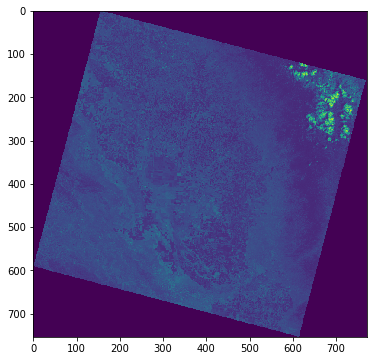

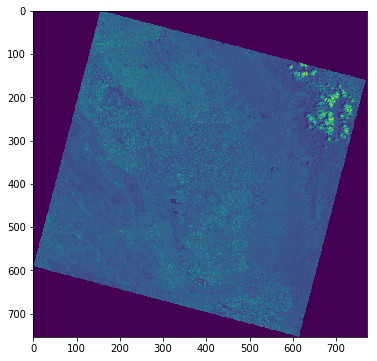

In [9]:
###### TRY TO GET THIS CELL TO RUN WITHOUT CHANGES

import matplotlib.pyplot as plt
from rasterio.plot import show
%matplotlib inline

with rasterio.open('../temp/LC80420352013156LGN00/redband_downsampled.TIF') as src:
    redband = src.read()
    fig = plt.figure(figsize = (6,6))
    rasterio.plot.show(redband)
with rasterio.open('../temp/LC80420352013156LGN00/nearIRband_downsampled.TIF') as src:
    nirband = src.read()
    fig = plt.figure(figsize = (6,6))
    rasterio.plot.show(nirband)

Your images should look like below.

![downsampled_raster_2.png MISSING](../images/downsampled_raster_2.png)

---


### Task: Calculate NDVI 

In [13]:
# M6:P6:Cell05
##------------
## Calculate NDVI
##------------  
nirband = nirband.astype(np.float64)
redband = redband.astype(np.float64)
ndvi = (nirband - redband)/(nirband + redband + 0.0000000001)

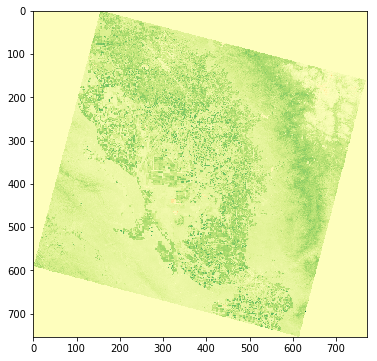

In [14]:
###### TRY TO GET THIS CELL TO RUN WITHOUT CHANGES

fig = plt.figure(figsize=(6,6))
rasterio.plot.show(ndvi, cmap = 'RdYlGn')

Your images should look like below. Use `cmap = "RdYlGn"`.

![ndvi_2.png MISSING](../images/ndvi_2.png)

---

### Task: Threshold the ndvi index with `T=0.3`

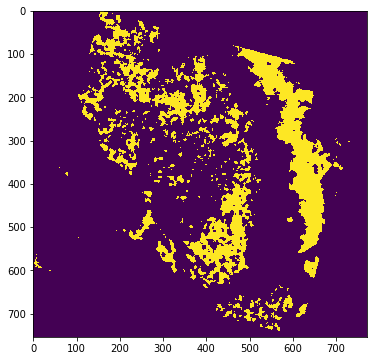

In [20]:
# M6:P6:Cell06
##------------
## Threshold NDVI
##------------
ndvi[np.where(ndvi>=0.3)] = 1
ndvi[np.where(ndvi<0.3)] = 0
fig = plt.figure(figsize= (6,6))
rasterio.plot.show(ndvi)


### Task: Median filtering

Perform median filtering of `redband` and `nirband` with windows of size 3&times;3. Calculate the NDVI index based on filtered images, threshold the NDVI index with `T=0.3`. Store the thresholded NDVI in the `segmented` variable.

In [29]:
# M6:P6:Cell07
##------------
## Median Filter redband and nirband
##------------

# Imports
from scipy.signal import medfilt
%matplotlib inline

redband = medfilt(redband, (1,21,21))
nirband = medfilt(nirband, (1,21,21))


## Calculate NDVI

nirband = nirband.astype(np.float64)
redband = redband.astype(np.float64)
segmented = (nirband - redband)/(nirband + redband+0.0000000001)



## Threshold NDVI

segmented[np.where(ndvi>=0.3)] = 1
segmented[np.where(ndvi<0.3)] = 0



The following code counts the number of isolated pixel groups in the thresholded image, note down the pixel group counts. Change the window size to 5&times;5, 11&times;11, 21&times;21, and note the pixel group count value for every window size.

In [30]:
###### TRY TO GET THIS CELL TO RUN WITHOUT CHANGES

from scipy.ndimage.measurements import label

segmented = np.squeeze(segmented)
s = np.array([[1,1,1],[1,1,1],[1,1,1]])
labeled, pixel_group_count = label(segmented, structure = s)

print('The thresholded image has {} pixel groups'.format(pixel_group_count))


The thresholded image has 483 pixel groups


-------- Record the pixel counts here ----------------

* 3x3 - 483
* 5x5 - 483
* 11x11 -483 
* 21x21 -483 

#### What is you observation on the pixel group counts on increasing the window size?

------ Write your observations here--------

The pixel count is the same despite the changes in the window size.

****
# Save your Notebook
## Then, File > Close and Halt